## Feature Engineering Practice

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\suraj\OneDrive\Desktop\Data Science\Datasets\retail_sales_dataset.csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.drop(df[['Transaction ID','Date','Customer ID']],axis = 1,inplace = True)

In [5]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100


### checking missing values

In [6]:
df.isnull().sum()

Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

### Handling outliers

In [7]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100


<Axes: >

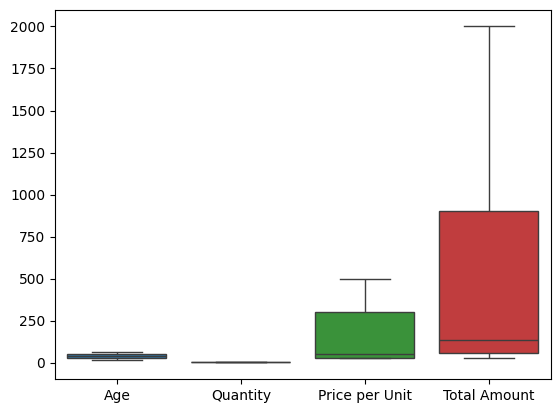

In [8]:
sns.boxplot(df) 
## according to given image there is no outliers, So there is no need to handle outliers

### Handling imbalance data

In [9]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,Male,34,Beauty,3,50,150
1,Female,26,Clothing,2,500,1000
2,Male,50,Electronics,1,30,30
3,Male,37,Clothing,1,500,500
4,Male,30,Beauty,2,50,100


In [10]:
df['Product Category'].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [11]:
df['Gender'].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

In [12]:
## according to above stats there is no big difference that's why there is no need to handle imbalance data

## encoding categorical variable

In [13]:
## performing label encoding in Gender feature and one hot encoding in Product Category feature
from sklearn.preprocessing import LabelEncoder

In [14]:
## label encoding
labelencoding = LabelEncoder()

In [15]:
encoded_gender = labelencoding.fit_transform(df['Gender'])

In [16]:
df['Gender'] = pd.DataFrame(encoded_gender,columns = ['Gender Encoded'])

In [17]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,34,Beauty,3,50,150
1,0,26,Clothing,2,500,1000
2,1,50,Electronics,1,30,30
3,1,37,Clothing,1,500,500
4,1,30,Beauty,2,50,100


In [18]:
## One hot encoding
encoded_product = pd.get_dummies(df['Product Category'])

In [19]:
df = pd.concat([df,encoded_product],axis = 1)

In [20]:
df.head()

,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Beauty,Clothing,Electronics
0,1,34,Beauty,3,50,150,1,0,0
1,0,26,Clothing,2,500,1000,0,1,0
2,1,50,Electronics,1,30,30,0,0,1
3,1,37,Clothing,1,500,500,0,1,0
4,1,30,Beauty,2,50,100,1,0,0


In [21]:
df.drop(df[['Product Category']],axis = 1,inplace = True)

In [22]:
df.head()

,Gender,Age,Quantity,Price per Unit,Total Amount,Beauty,Clothing,Electronics
0,1,34,3,50,150,1,0,0
1,0,26,2,500,1000,0,1,0
2,1,50,1,30,30,0,0,1
3,1,37,1,500,500,0,1,0
4,1,30,2,50,100,1,0,0


### Feature scaling

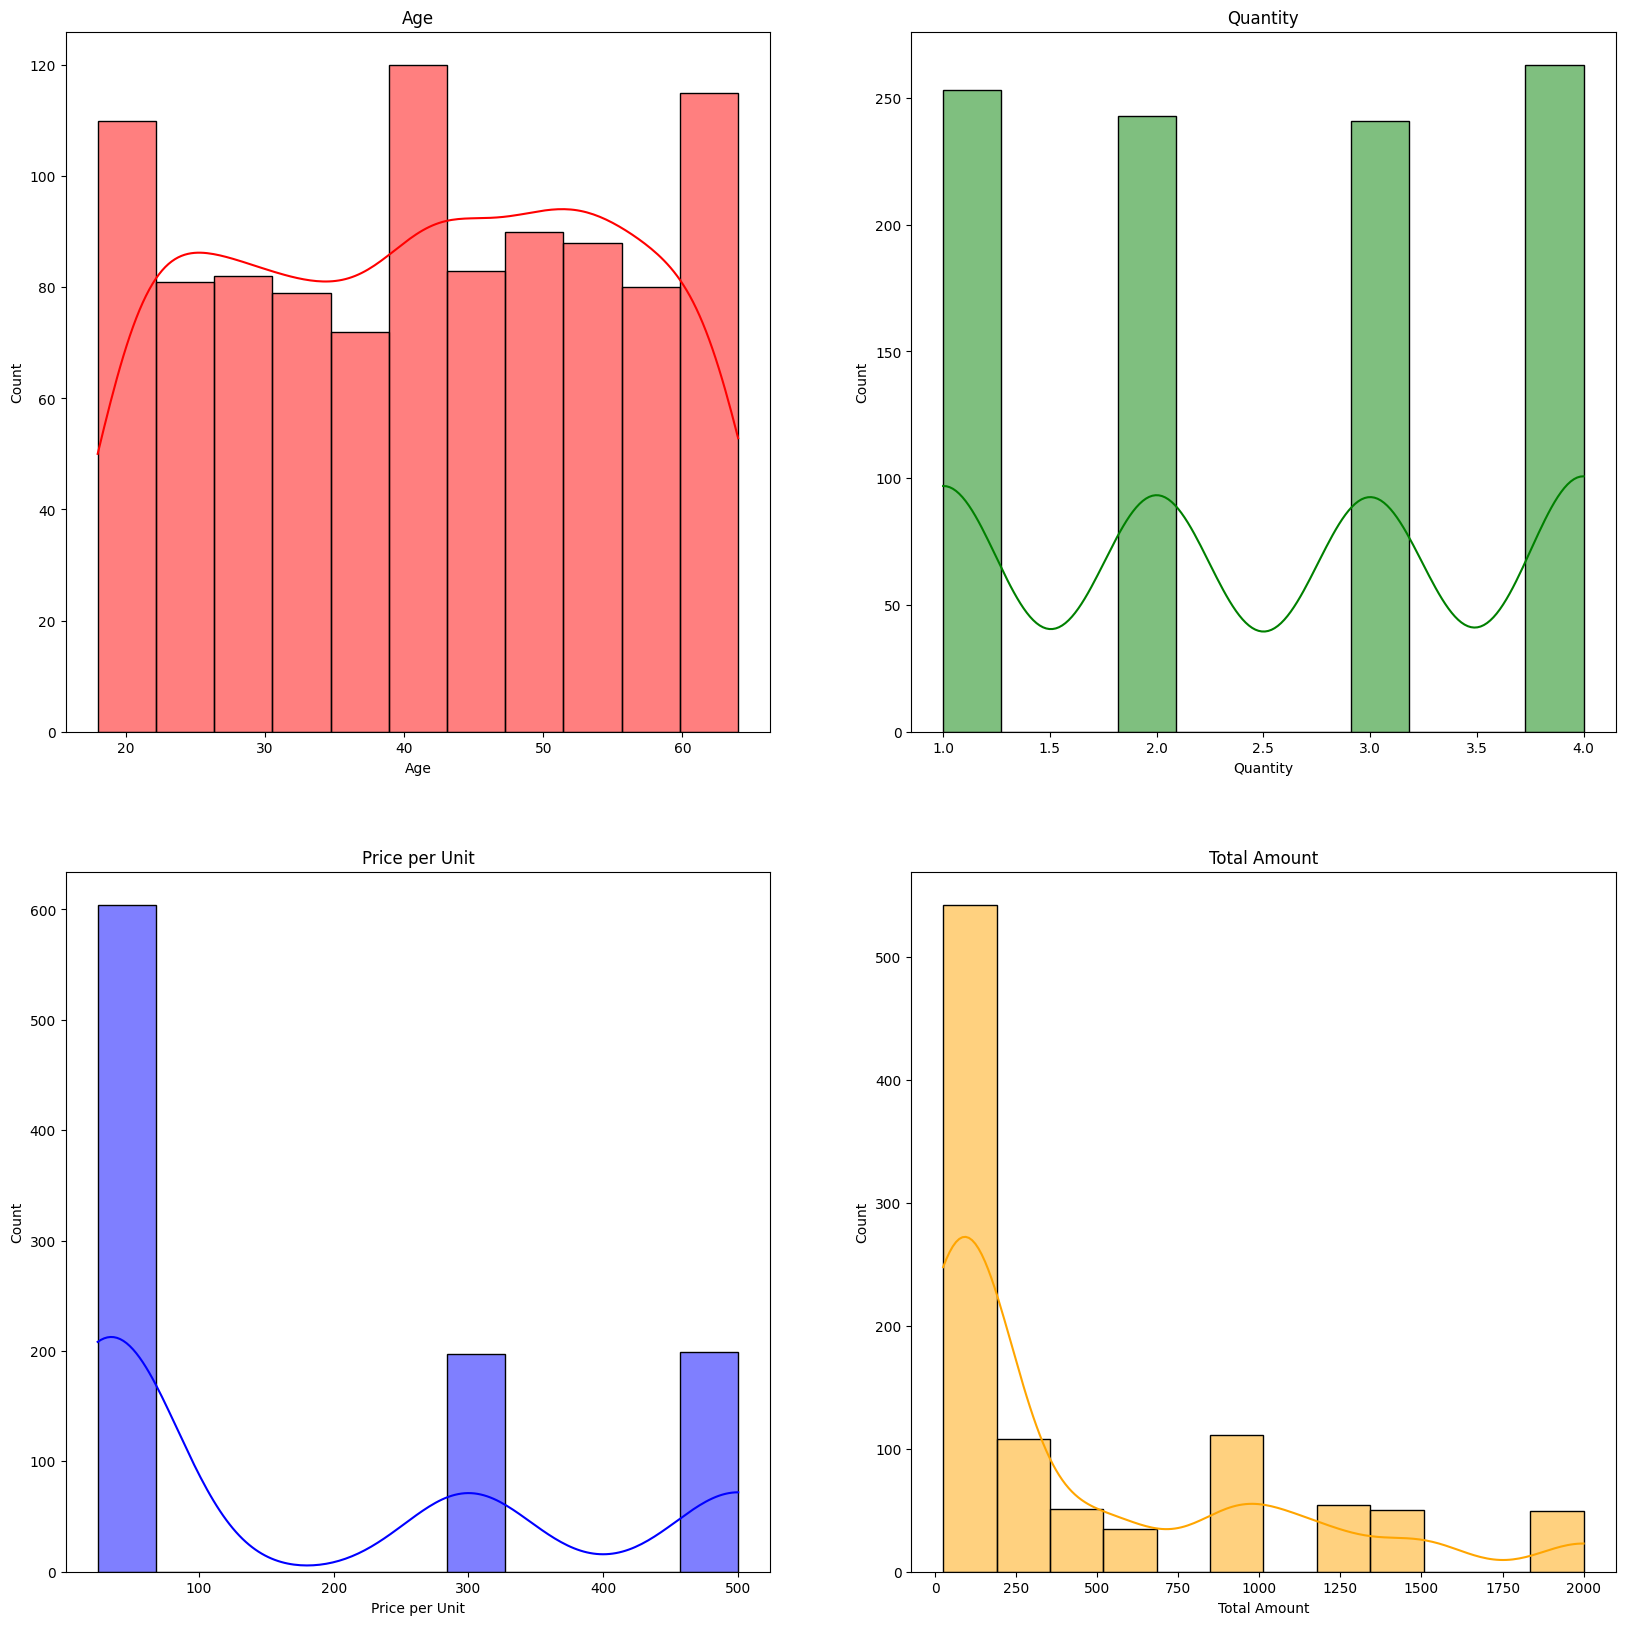

In [44]:
fig,axs = plt.subplots(2,2,figsize = (20,20))

sns.histplot(df['Age'], kde = True,color = 'red',ax = axs[0,0])
axs[0,0].set_title('Age')

sns.histplot(df['Quantity'], kde = True,color = 'green',ax = axs[0,1])
axs[0,1].set_title('Quantity')

sns.histplot(df['Price per Unit'], kde = True,color = 'blue',ax = axs[1,0])
axs[1,0].set_title('Price per Unit')

sns.histplot(df['Total Amount'], kde = True,color = 'orange',ax = axs[1,1])
axs[1,1].set_title('Total Amount')

plt.show()

In [45]:
## performing feature scaling using Standardization technique
from sklearn.preprocessing import StandardScaler

In [46]:
standard_scaler = StandardScaler()

In [48]:
scaled_data = standard_scaler.fit_transform(df[['Age','Quantity','Price per Unit','Total Amount']])

In [49]:
df[['Age','Quantity','Price per Unit','Total Amount']] = pd.DataFrame(scaled_data,
                        columns = ['Age','Quantity','Price per Unit','Total Amount'])

In [50]:
df.head()

,Gender,Age,Quantity,Price per Unit,Total Amount,Beauty,Clothing,Electronics
0,1,-0.540565,0.429265,-0.685123,-0.546704,1,0,0
1,0,-1.125592,-0.453996,1.688464,0.971919,0,1,0
2,1,0.629489,-1.337258,-0.790615,-0.761098,0,0,1
3,1,-0.321180,-1.337258,1.688464,0.078611,0,1,0
4,1,-0.833078,-0.453996,-0.685123,-0.636035,1,0,0


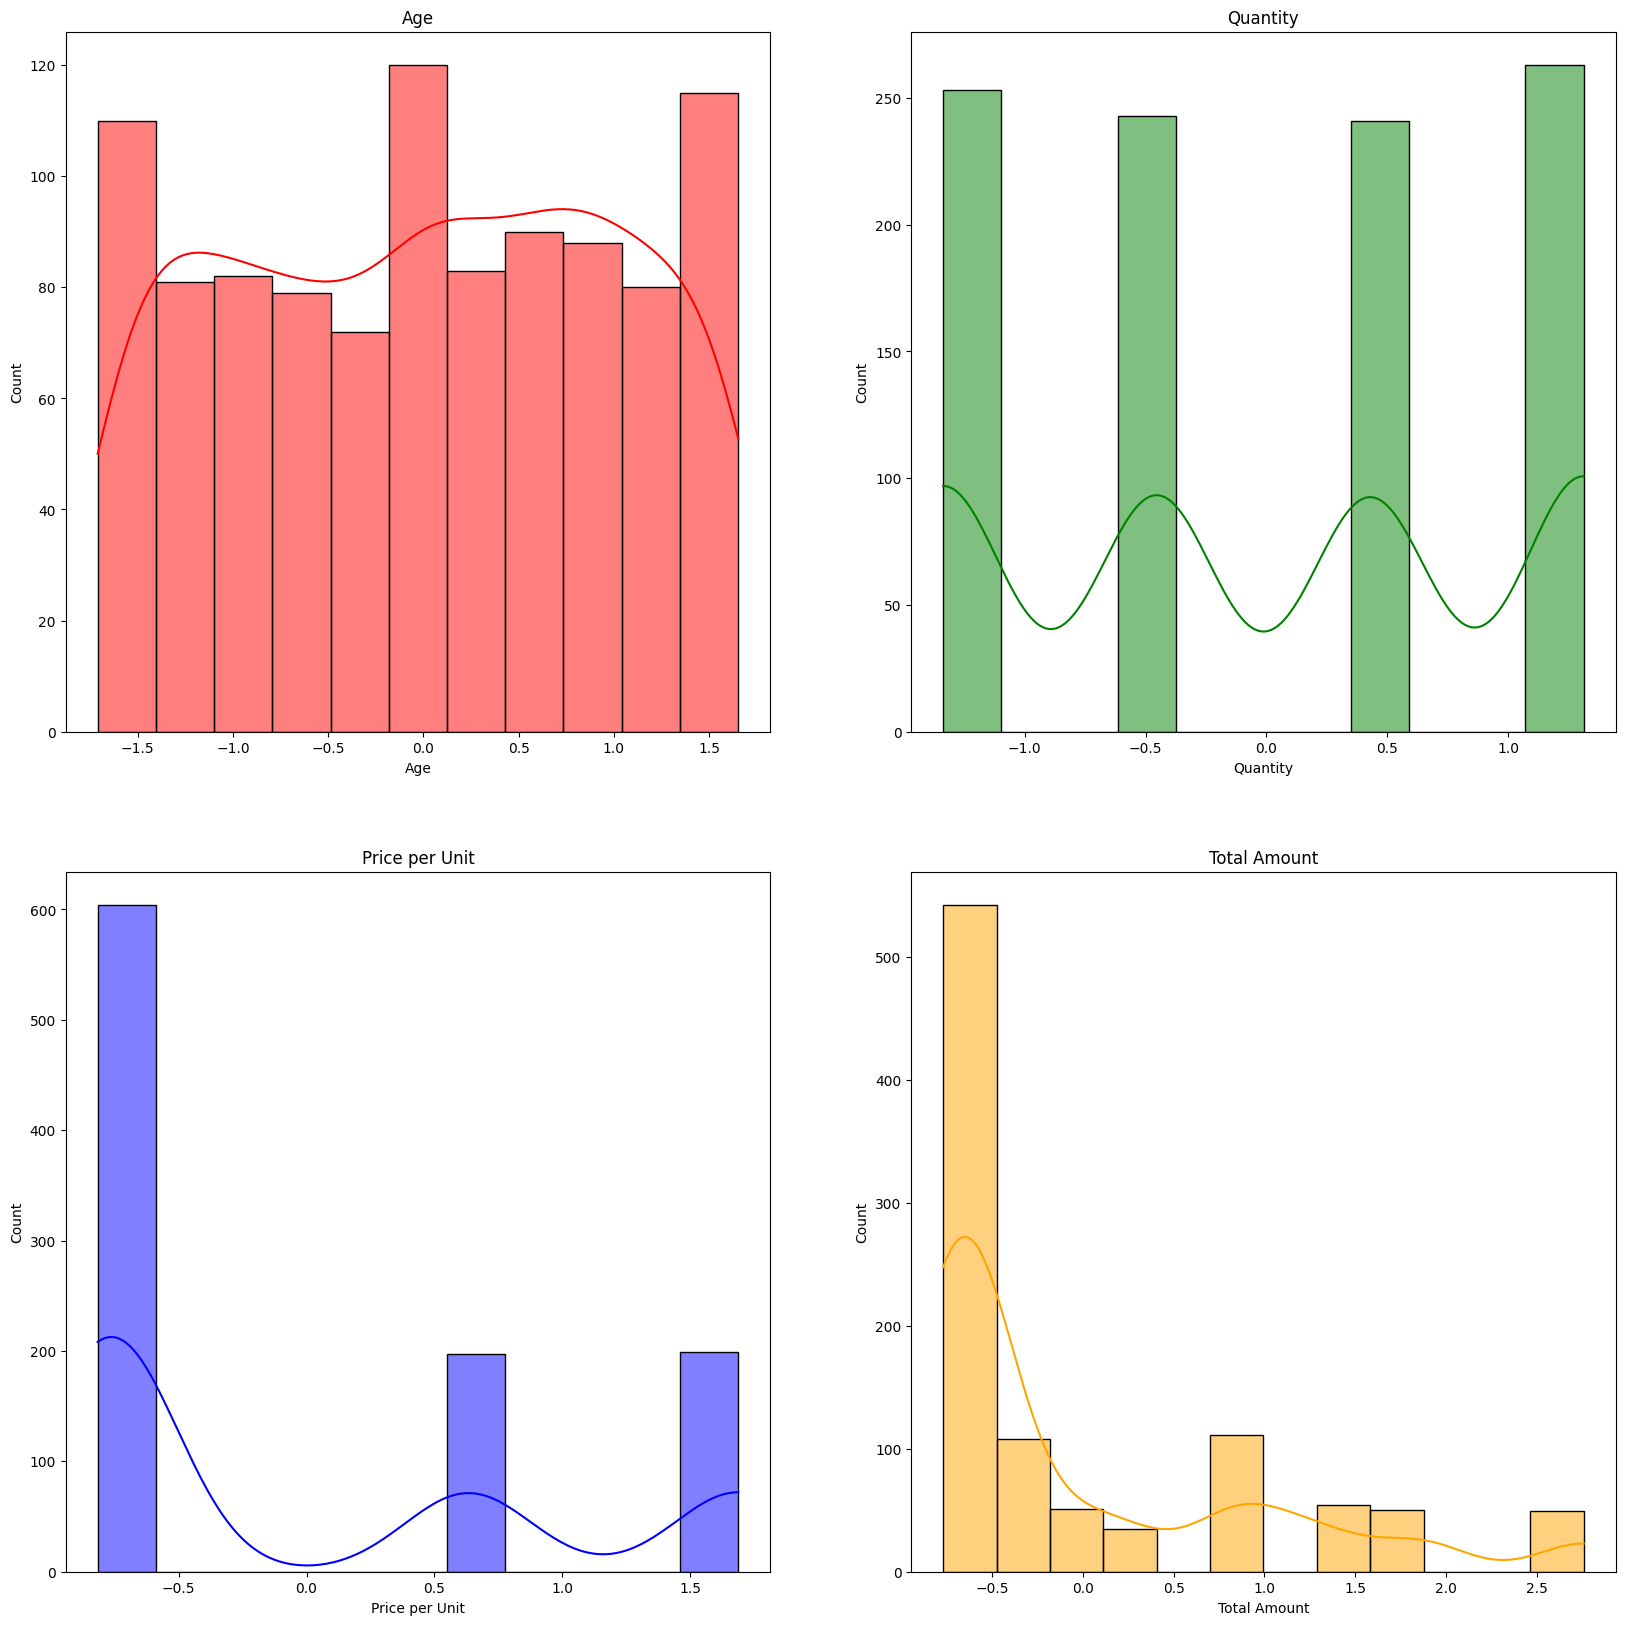

In [51]:
fig,axs = plt.subplots(2,2,figsize = (20,20))

sns.histplot(df['Age'], kde = True,color = 'red',ax = axs[0,0])
axs[0,0].set_title('Age')

sns.histplot(df['Quantity'], kde = True,color = 'green',ax = axs[0,1])
axs[0,1].set_title('Quantity')

sns.histplot(df['Price per Unit'], kde = True,color = 'blue',ax = axs[1,0])
axs[1,0].set_title('Price per Unit')

sns.histplot(df['Total Amount'], kde = True,color = 'orange',ax = axs[1,1])
axs[1,1].set_title('Total Amount')

plt.show()